In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data = pd.get_dummies(data, columns = ['Sex','ChestPainType' ,'RestingECG', 'ExerciseAngina', 'ST_Slope'])
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:
fc = data.pop('HeartDisease')
data.insert(len(list(data)), 'HeartDisease', fc)
#data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [9]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
#data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,Y_train)

SVC()

In [13]:
Y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc = accuracy_score(Y_pred, Y_test)
print('Accuracy score  = %0.2f' %(acc*100))

prec = precision_score(Y_pred, Y_test)
print('Precision score  = %0.2f' % (prec*100))

recall = recall_score(Y_pred, Y_test)
print('Recall score = %0.2f' % (recall*100))

f1 = f1_score(Y_pred, Y_test)
print('f1 score  = %0.2f' % (f1*100))

Accuracy score  = 85.87
Precision score  = 90.65
Recall score = 85.84
f1 score  = 88.18


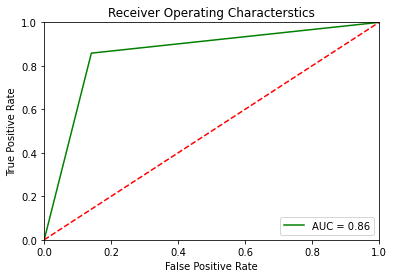

In [15]:
#not in practical file
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(Y_pred, Y_test)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc) #0.2f precision #g - green
plt.legend(loc = 'lower right') 
plt.plot([0,1], [0,1], 'r--') #read-write-execute
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', random_state = 0)
clf.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [17]:
Y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc = accuracy_score(Y_pred, Y_test)
print('Accuracy score  = %0.2f' %(acc*100))

prec = precision_score(Y_pred, Y_test)
print('Precision score  = %0.2f' % (prec*100))

recall = recall_score(Y_pred, Y_test)
print('Recall score = %0.2f' % (recall*100))

f1 = f1_score(Y_pred, Y_test)
print('f1 score  = %0.2f' % (f1*100))

Accuracy score  = 84.24
Precision score  = 90.65
Recall score = 83.62
f1 score  = 87.00


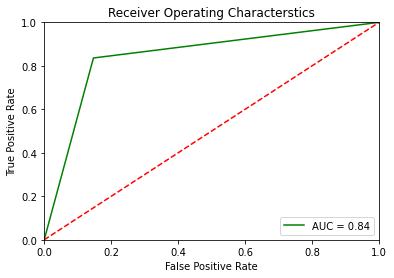

In [19]:
#not in file
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(Y_pred, Y_test)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc) #0.2f precision #g - green
plt.legend(loc = 'lower right') 
plt.plot([0,1], [0,1], 'r--') #read-write-execute
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
#Not in Practical File
from sklearn.metrics import log_loss
loss = log_loss(Y_test, Y_pred)
print('Log-Loss score = %0.3f' % (loss))

Log-Loss score = 5.444
